## RNN  
SimpleRNN

In [49]:
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

print(W.shape, inputs[0].shape, U.shape, b.shape)  # input[0] --> An input data
print((np.dot(W, input_t)).shape)
print((np.dot(U, state_t)).shape)


successive_outputs = []

for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
final_output_sequence = np.concatenate(successive_outputs, axis=0)

(64, 32) (32,) (64, 64) (64,)
(64,)
(64,)


In [50]:
from keras import models, layers
import keras
import matplotlib.pyplot as plt

In [51]:
model = models.Sequential()
model.add(layers.Embedding(10000, 32))
model.add(layers.SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [52]:
model = models.Sequential()
model.add(layers.Embedding(10000, 32))
model.add(layers.SimpleRNN(32,return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [53]:
def plotting_keras_acc(history):
    history = history.history
    train_acc = history['acc']
    val_acc = history['val_acc']
    train_loss = history['loss']
    val_loss = history['val_loss']
    
    epochs = np.arange(1, len(train_acc)+1)
    
    plt.plot(epochs, train_loss, '.-', label='Train Loss')
    plt.plot(epochs, val_loss, '-', label='Validation Loss')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.grid()
    plt.legend()
    plt.show()
    
    plt.clf()
    
    plt.plot(epochs, train_acc, '.-', label='Train Accuracy')
    plt.plot(epochs, val_acc, '-', label='Validation Accuracy')
    plt.xlabel("epochs")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.legend()
    plt.show()

#### Loading data from kears

In [54]:
from keras.datasets import imdb

In [55]:
max_features = 10000
maxlen = 500
batch_size = 32

In [56]:
(train_data, train_label),(test_data, test_label) = imdb.load_data(num_words=max_features)
print(train_data.shape, train_label.shape, test_data.shape, test_label.shape)

(25000,) (25000,) (25000,) (25000,)


In [57]:
train_data[:2]

array([ list([1, 6899, 164, 329, 74, 6, 20, 1615, 310, 7, 4, 3469, 248, 569, 119, 298, 405, 2, 46, 19, 6527, 7, 1006, 2, 4827, 9, 6, 8373, 418, 7, 5628, 15, 820, 131, 1030, 8, 2836, 5, 4, 485, 109, 133, 6145, 503, 283, 66, 9, 49, 243, 7, 2, 6, 2, 24, 2817, 8501, 871, 38, 52, 267, 15, 60, 41, 2, 2, 47, 93, 6, 1345, 33, 41, 5, 19, 6, 8548, 1432, 11, 175, 2, 14, 2, 2, 5586, 66, 127, 276, 4, 4585, 11, 2, 51, 19, 41, 2, 8807, 9756, 11, 162, 782, 41, 6377, 19, 2112, 712, 11, 6127, 5, 41, 2, 5235, 741, 323, 2767, 11, 2014, 6, 6145, 252, 127, 401, 2958, 5, 54, 442, 24, 2, 134, 493, 7, 32, 68, 2, 2, 17, 4, 529, 2271, 442, 2, 8, 30, 656, 6, 6620, 707, 3693, 312, 2, 2, 125, 2, 5, 2, 6944, 2, 4360, 4807, 5, 5564, 6, 2, 589, 23, 41, 4614, 17, 13, 301, 8373, 253, 5, 1348, 52, 18, 6, 314, 54, 335, 547, 643, 1224, 351, 5, 43, 181, 8, 2, 46, 11, 1011, 7, 4, 5153, 705, 2, 2, 2, 127, 721, 49, 9951, 1382, 8, 41, 217, 17, 6145, 5, 4, 22, 272, 2252, 195, 8, 591, 2, 2, 5819, 2, 2, 2, 5, 1083, 2, 2544, 1911, 

In [58]:
word_index = imdb.get_word_index()
print(list(word_index)[:4])

['fawn', 'tsukino', 'nunnery', 'sonja']


#### Padding the data

In [59]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, maxlen=maxlen)

train_label = np.asarray(train_label, dtype='float32')
test_label = np.asarray(test_label, dtype='float32')

#### Building the model

In [60]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.SimpleRNN(32))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
hist = model.fit(train_data, train_label,
                 epochs=10,
                 batch_size=128,
                 validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 32s 2ms/step - loss: 0.5951 - acc: 0.6713 - val_loss: 0.4620 - val_acc: 0.7836
Epoch 2/10
20000/20000 [==============================] - 34s 2ms/step - loss: 0.3722 - acc: 0.8457 - val_loss: 0.3659 - val_acc: 0.8480
Epoch 3/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.2833 - acc: 0.8878 - val_loss: 0.3547 - val_acc: 0.8476
Epoch 4/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.2160 - acc: 0.9202 - val_loss: 0.7672 - val_acc: 0.7382
Epoch 5/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.1608 - acc: 0.9406 - val_loss: 0.3813 - val_acc: 0.8454
Epoch 6/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.1101 - acc: 0.9632 - val_loss: 0.4124 - val_acc: 0.8462
Epoch 7/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.0751 - acc: 0.9755 - val_loss: 0.4812 - val_acc:

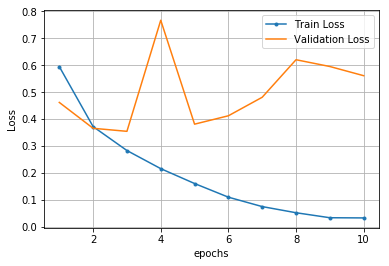

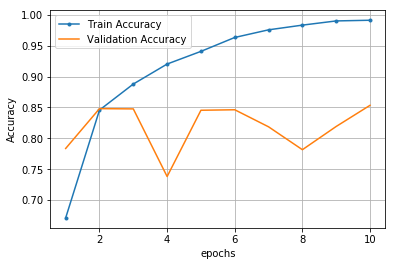

In [63]:
plotting_keras_acc(hist)

## RNN - LSTM

In [64]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [66]:
hist = model.fit(train_data, train_label,
                 epochs=10,
                 batch_size=128,
                 validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 81s 4ms/step - loss: 0.5521 - acc: 0.7303 - val_loss: 0.4344 - val_acc: 0.8074
Epoch 2/10
20000/20000 [==============================] - 67s 3ms/step - loss: 0.3119 - acc: 0.8764 - val_loss: 0.3118 - val_acc: 0.8710
Epoch 3/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.2491 - acc: 0.9080 - val_loss: 0.3498 - val_acc: 0.8790
Epoch 4/10
20000/20000 [==============================] - 75s 4ms/step - loss: 0.2107 - acc: 0.9216 - val_loss: 0.3056 - val_acc: 0.8768
Epoch 5/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.1859 - acc: 0.9330 - val_loss: 0.3262 - val_acc: 0.8850
Epoch 6/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.1635 - acc: 0.9428 - val_loss: 0.3172 - val_acc: 0.8702
Epoch 7/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.1490 - acc: 0.9469 - val_loss: 0.3952 - val_acc:

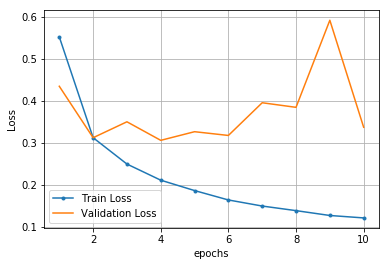

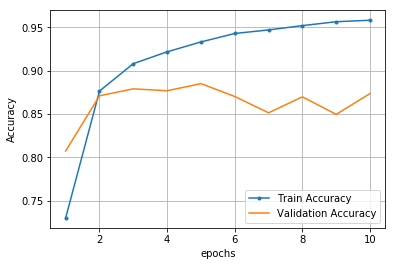

In [67]:
plotting_keras_acc(hist)